In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns 
import numpy as np 

In [3]:
df = pd.read_csv("rfm_data_customer.csv", index_col=0)
df.head()

,revenue,most_recent_visit,number_of_orders,recency_days
customer_id,,,,
22086,777,2006-05-14,9,232
2290,1555,2006-09-08,16,115
26377,336,2006-11-19,5,43
24650,1189,2006-10-29,12,64
12883,1229,2006-12-09,12,23


In [7]:
df.drop('most_recent_visit',axis=1,inplace=True)

In [8]:
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(df)
df_scaled=scaler.transform(df)

In [10]:
Ks = [2,3,4,5,6]
scores = []
for k in Ks:
    clust = KMeans(n_clusters=k,init='k-means++', random_state=24)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

In [11]:
i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

Best no. of clusters: 3
Best Score: 0.37102897041720206


In [12]:
clust = KMeans(n_clusters=Ks[i_max], random_state=24)
clust.fit(df_scaled)

KMeans(n_clusters=3, random_state=24)

In [13]:
clust_data = df.copy()
clust_data['Clust'] = clust.labels_

In [14]:
print( clust_data.groupby('Clust').mean() )
print( clust_data['Clust'].value_counts() )

           revenue  number_of_orders  recency_days
Clust                                             
0      1281.119459         12.909267    133.255123
1       749.292247          8.227773    136.139784
2       692.414498          7.351090    416.697185
Clust
1    18457
0    14934
2     6608
Name: count, dtype: int64


In [16]:
clust_corr = clust_data.groupby('Clust').corr()
clust_corr

revenue  number_of_orders  recency_days
Clust                                                           
0     revenue           1.000000          0.608137     -0.010057
      number_of_orders  0.608137          1.000000     -0.057150
      recency_days     -0.010057         -0.057150      1.000000
1     revenue           1.000000          0.633329     -0.011593
      number_of_orders  0.633329          1.000000     -0.047350
      recency_days     -0.011593         -0.047350      1.000000
2     revenue           1.000000          0.799252     -0.100518
      number_of_orders  0.799252          1.000000     -0.158976
      recency_days     -0.100518         -0.158976      1.000000

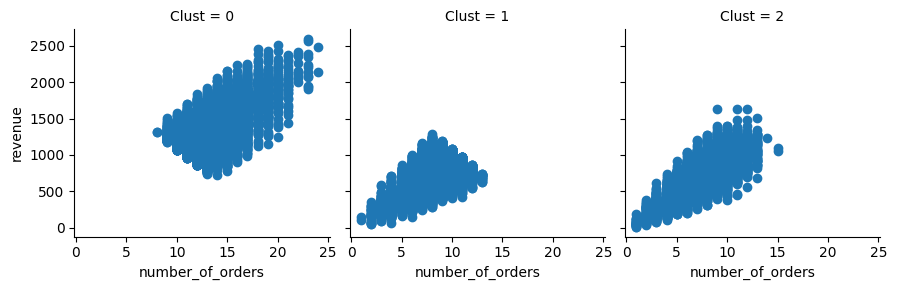

In [17]:
g = sns.FacetGrid(clust_data, col="Clust")
g.map(plt.scatter, "number_of_orders", "revenue")
plt.show()

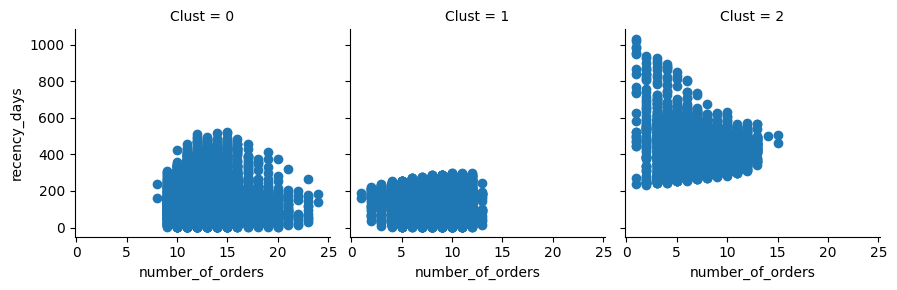

In [19]:
g = sns.FacetGrid(clust_data, col="Clust")
g.map(plt.scatter, "number_of_orders", "recency_days")
plt.show()

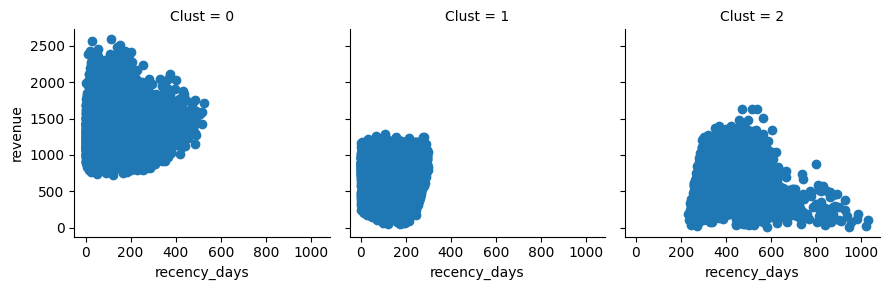

In [20]:
g = sns.FacetGrid(clust_data, col="Clust")
g.map(plt.scatter, "recency_days", "revenue")
plt.show()